# Merging lyrics into the final dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/ds2.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/ds2.csv'

In [ ]:
fds = pd.read_csv("data/master_dataset.csv")

In [ ]:
final_ds =pd.read_csv("data/final_dataset.csv")

In [ ]:
df.head()

,title,tag,artist,year,views,features,lyrics,id
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",3
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,4
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,5
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",6


In [ ]:
fds.columns

Index(['source', 'domain', 'chart', 'region', 'country', 'continent', 'date',
       'position', 'title', 'artist', 'url', 'scraped_at', 'city', 'track_id',
       'album', 'energy', 'danceability', 'valence', 'tempo', 'loudness',
       'acousticness', 'instrumentalness', 'speechiness', 'liveness'],
      dtype='object')

In [ ]:
fds.shape

(1425, 24)

In [ ]:
df = df.drop(labels=["tag","year","views","id","features"], axis=1)

In [ ]:
df.columns

Index(['title', 'artist', 'lyrics'], dtype='object')

In [ ]:
merged = fds.merge(
    df,
    left_on=['title', 'artist'],
    right_on=['title', 'artist'],
    how='left'
)

In [ ]:
merged.columns

Index(['source', 'domain', 'chart', 'region', 'country', 'continent', 'date',
       'position', 'title', 'artist', 'url', 'scraped_at', 'city', 'track_id',
       'album', 'energy', 'danceability', 'valence', 'tempo', 'loudness',
       'acousticness', 'instrumentalness', 'speechiness', 'liveness',
       'lyrics'],
      dtype='object')

In [ ]:
merged["lyrics"].isna().sum()

np.int64(1156)

In [ ]:
lyrics_only = final_ds[['artist', 'title', 'lyrics']]
merged = merged.merge(
    lyrics_only,
    on=['artist', 'title'],
    how='left'
)

In [ ]:
merged.drop(labels=["lyrics_x"], axis=1, inplace=True)
merged.rename(columns={"lyrics_y": "lyrics"}, inplace=True)

In [ ]:
merged["lyrics"].isna().sum()

np.int64(822)

Half of the lyrics are still missing

In [ ]:
import lyricsgenius
import time

genius = lyricsgenius.Genius("Dm_OS9PJm_1854rqdgXQX2BbTRjTb6pQ0kVScZUChIn8eoUvtzKKgjQPC88DuomX")
genius.verbose = False
genius.remove_section_headers = True

def get_lyrics(track_name, artist_name):
    try:
        time.sleep(1)  # avoid rate limit
        song = genius.search_song(track_name, artist_name)
        if song:
            return song.lyrics
        return None
    except Exception as e:
        print(f"--- Error fetching lyrics for {track_name}: {e}")
        return None


In [ ]:
# apply only to missing lyrics
import re

missing_mask = merged['lyrics'].isna()

merged.loc[missing_mask, 'lyrics'] = merged.loc[missing_mask].apply(
    lambda row: get_lyrics(
        re.sub(r"\s*\(.*?\)", "", row['title']).strip('"').strip(),    # clean title
        row['artist'].split(' ')[0].strip()                          # first artist
    ),
    axis=1
)


--- Error fetching lyrics for Billie Jean: Request timed out:
HTTPSConnectionPool(host='api.genius.com', port=443): Read timed out. (read timeout=5)
--- Error fetching lyrics for All I Want For Christmas Is You: Request timed out:
HTTPSConnectionPool(host='api.genius.com', port=443): Read timed out. (read timeout=5)
--- Error fetching lyrics for Last Christmas: Request timed out:
HTTPSConnectionPool(host='api.genius.com', port=443): Read timed out. (read timeout=5)
--- Error fetching lyrics for All I Want for Christmas Is You: Request timed out:
HTTPSConnectionPool(host='api.genius.com', port=443): Read timed out. (read timeout=5)


In [ ]:
merged['lyrics'].isna().sum()

np.int64(176)

In [ ]:
merged[1000:1020][['artist', 'title', 'lyrics']]

,artist,title,lyrics
1000,DeeYasso,Addiction,None
1001,Davido,Hip Hop Messiah Zlatan,"Baddest, Zanku\nOmo, ma lo go (Do do do, do do..."
1002,Jim Legxacy,No Weapons Dave,Weapons\nNo weapon that's been fashioned ’gain...
1003,Jonn,Full Control Young,"(Giddem, Giddem, Giddem)\n(Wil'- Wil'- Wil'- W..."
1004,Stevehills,Oluwatosin Tkeyz,Oluwatosin\nOluwatosin\nThe Jesus that I know ...
1005,Dave,My 27th Birthday,(Everything's fine)\nLook\n\nWhite fish on the...
1006,Kunmie,Sanity Bella Shmurda,"Sanity, mm-uh\nEverything we chase is vanity (..."
1007,Hotkid,Better Days,Intro: (Lil Outfit)\nGet ready you bitches\n'B...
1008,James Blake,Selfish Dave,What if I'm selfish? What if I'm the reason be...
1009,Ruger,Make Way,"Make way\nYou gotta see what I came with, uhn\..."


In [ ]:
merged.shape

(1425, 25)

Still 176 lyrics missing

In [ ]:
get_lyrics("Hip Hop Messiah Zlatan", "Davido")

"Baddest, Zanku\nOmo, ma lo go (Do do do, do do do)\nAh, yeah\n\nIf no be money, na whining\nMe I no dey wetin no concern me\nOmo ologo no die untimely\nSending different prayers fun awon ota mi (Ota mi)\nOri jo lomo no fugazi (Fugazi), ore mi ti lagbara sati gbe\nThree sixty on timing, Oluwa don dey bless me (Yeah)\n\nBad energy I no fit control\nSuperstar life wan fe ya mi photo\nMe I dey my own, I no dey poke nose\nCarpenter mi, de ma fe yin yoso\nEni t'owo n sise lo ma gbowo\nI no dey look Uche face on the road o\nCover my face, I no want apollo, check my polo\n\nOh, hip-hop messiah (Messiah)\nI no fit stop 'cause my peru don dey para (Don dey para)\nOh, ignite the fire (Oh)\nJust give me fifty-fifty, I no like wahala (I no like wahala)\n\nEwo oju mi se mo kola (Kola)\nDiamonds on me, Timmy Turner\nI am rising like I'm dollar\nI am rising like I'm dollar, mo lola o\nMoti japa, japa from sapa\nFor life, I dey para\nOsimhen, me I be attacker, wallahi\n\nBad energy I no fit control\nS

In [ ]:
merged[merged['lyrics'].isna()]

,source,domain,chart,region,country,continent,date,position,title,artist,...,energy,danceability,valence,tempo,loudness,acousticness,instrumentalness,speechiness,liveness,lyrics
326,billboard,billboard.com,hot-100,NaN,NaN,NaN,2022-01-01,37,Linus And Lucy (Peanuts Theme),Vince Guaraldi Trio,...,0.386,0.497,0.695,81.774,-14.177,0.784,0.927,0.038,0.167,None
604,NaN,billboard.com,Greatest of All Time Hot 100 Singles,US,NaN,NaN,NaN,21,Tonight's The Night (Gonna Be Alright),Rod Stewart,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
605,NaN,billboard.com,Greatest of All Time Hot 100 Singles,US,NaN,NaN,NaN,22,Foolish Games/You Were Meant For Me,Jewel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
606,NaN,billboard.com,Greatest of All Time Hot 100 Singles,US,NaN,NaN,NaN,25,"The Theme From ""A Summer Place""",Percy Faith And His Orchestra,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
633,NaN,billboard.com,Greatest of All Time Hot 100 Singles,US,NaN,NaN,NaN,58,Candle In The Wind 1997/Something About The Wa...,Elton John,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,NaN,turntablecharts.com,TurnTable Top 100 Album,NaN,NaN,NaN,NaN,83,Pawon Boy Vol. 1 (Deluxe) Tml Vibez,DJ 4kerty,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1412,NaN,turntablecharts.com,TurnTable Top 100 Album,NaN,NaN,NaN,NaN,87,AWAKENING,Xploitcomedy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1415,NaN,turntablecharts.com,TurnTable Top 100 Album,NaN,NaN,NaN,NaN,90,Death Race For Love Juice,WRLD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1422,NaN,turntablecharts.com,TurnTable Top 100 Album,NaN,NaN,NaN,NaN,98,"More Love, Less Ego",Wizkid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [ ]:
merged.loc[merged["track_name"] == "うっせぇわ", "lyrics"] = get_lyrics("うっせぇわ", "")

2 songs remaining: 1 is instrumental, the other's lyrics are not found by either of the methods, but it's findable on the web

In [ ]:
merged.loc[merged["track_name"] == "海のリビング", "lyrics"] = "太陽が 咲いた\nうざったいくらい部屋ん中\n照らしてくれるじゃんか夏\n男、女 の性が\n暑さに反応 heartbeat\n\nグループLINEに送信 からの一瞬で返信\n目覚めのミルクティー いつもより遥か美味\nお気にのAir Force鏡でチェックして\nあいつの車置き場にダッシュして\n「お待たせ、いやお待たせし過ぎたね」\n“今日を皆んなで最高にする”このポテンシャル\n\n四人乗りの車で走らす\n湾岸線でこの曲流して\nホワイトムスクと 潮風が\n今日の思い出にスパイスを\n\n四人乗りの車で走らす\nそろそろ見えてくる場所は\nパッパッとお悩み 追っ払って\n笑顔を増やす海のリビング yeah\n\n「喉渇いたあ」「一旦コンビニよろ！」\nきんきんに冷えたコーラ\nファミチキ食べて気分豪華\n車のナンバー隠してはいチーズ\n\nうちらがファッション先取り 仲良しこよし\nエンジンかけてBluetooth 「え？え？」\nボリューム上げようか\n\n四人乗りの車で走らす\n湾岸線でこの曲流して\nホワイトムスクと潮風が\n今日の思い出にスパイスを\n\nお金も ないけど\n笑えりゃ無問題\nでもずっとは無いね\nこの気持ち無くさぬように yeah\n\n四人乗りの車で走らす\n海岸沿いでこの曲流して\nホワイトムスクと潮風が\n今日の思い出にスパイスを\n\n四人乗りの車で走らす\nそろそろ見えてくる場所は\n何年経っても 変わらずに\n笑顔を増やす海のリビング yeah"

In [ ]:
merged[merged['lyrics'].isna()]

,source,domain,chart,region,date,position,title,artist,url,scraped_at,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,playlistname,lyrics
326,billboard,billboard.com,hot-100,NaN,2022-01-01,37,Linus And Lucy (Peanuts Theme),Vince Guaraldi Trio,NaN,2025-11-22T15:10:20.303946+00:00,...,0.038,0.784,0.927,0.167,0.695,81.774,4,jazz,DW Emotion Exercise - Joy,None


# Adding a happiness score from lyrics using a prebuilt model

In [ ]:
import re

def clean_lyrics(text):
    if pd.isna(text):
        return ""
    text = re.sub(r'\[.*?\]', '', text)
    text = text.replace('\n', ' ').replace('\r', ' ')
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [ ]:
d_lyrics = merged.copy()
d_lyrics['lyrics_clean'] = d_lyrics['lyrics'].apply(clean_lyrics)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()  


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [ ]:
def get_happiness_chunks(text, max_tokens=512):
    words = text.split()
    chunk_size = 200  # ~200 words per chunk; will truncate inside tokenizer
    
    scores = []
    for i in range(0, len(words), chunk_size):
        chunk_text = " ".join(words[i:i+chunk_size])
        
        # Tokenize chunk with truncation
        inputs = tokenizer(
            chunk_text,
            truncation=True,
            padding=True,
            max_length=max_tokens,
            return_tensors="pt"
        )
        
        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits
            probs = torch.softmax(logits, dim=1).squeeze()
            # Convert logits to stars: 0 -> 1 star, 4 -> 5 stars
            star_score = sum((i+1)*probs[i].item() for i in range(len(probs)))
            # Normalize to 0-1
            happiness = (star_score - 1)/4
            scores.append(happiness)
    
    return np.mean(scores)


In [ ]:
merged['happiness_from_lyrics'] = d_lyrics['lyrics_clean'].apply(get_happiness_chunks)

C:\Users\tomfo\AppData\Roaming\Python\Python313\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\tomfo\AppData\Roaming\Python\Python313\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
merged.head()

,source,domain,chart,region,country,continent,date,position,title,artist,...,danceability,valence,tempo,loudness,acousticness,instrumentalness,speechiness,liveness,lyrics,happiness_from_lyrics
0,billboard,billboard.com,hot-100,NaN,NaN,NaN,2023-01-07,39,Under The Influence,Chris Brown,...,0.733,0.310,116.992,-5.529,0.0635,0.000001,0.0427,0.1050,"Kido, Kido\r\nK-K-Kido on the beat, better run...",0.395045
1,billboard,billboard.com,hot-100,NaN,NaN,NaN,2022-07-02,45,Efecto,Bad Bunny,...,0.801,0.234,98.047,-8.797,0.1410,0.000017,0.0516,0.0639,Yeah-yeah-yeah-yeah-yeah-yeah\r\nEh-eh-eh-eh\r...,0.317055
2,billboard,billboard.com,hot-100,NaN,NaN,NaN,2022-07-02,78,I Ain't Worried,OneRepublic,...,0.704,0.825,139.994,-5.927,0.0826,0.000745,0.0475,0.0546,I don't know what you've been told\r\nBut time...,0.567530
3,billboard,billboard.com,hot-100,NaN,NaN,NaN,2023-01-07,31,As It Was,Harry Styles,...,0.520,0.662,173.930,-5.338,0.3420,0.001010,0.0557,0.3110,"[Intro]\r\nCome on, Harry, we wanna say goodni...",0.378523
4,billboard,billboard.com,hot-100,NaN,NaN,NaN,2022-07-02,8,Glimpse Of Us,Joji,...,0.440,0.268,169.914,-9.258,0.8910,0.000005,0.0531,0.1410,She'd take the world off my shoulders\r\nIf it...,0.521973


In [ ]:
saddest_song = merged.loc[merged['happiness_from_lyrics'].idxmax()]
print(saddest_song)

source                                                                 NaN
domain                                                       billboard.com
chart                                 Greatest of All Time Hot 100 Singles
region                                                                  US
country                                                                NaN
continent                                                              NaN
date                                                                   NaN
position                                                                67
title                                                                 Lady
artist                                                        Kenny Rogers
url                                                                    NaN
scraped_at                                2025-11-22T13:42:37.507466+00:00
city                                                                   NaN
track_id                 

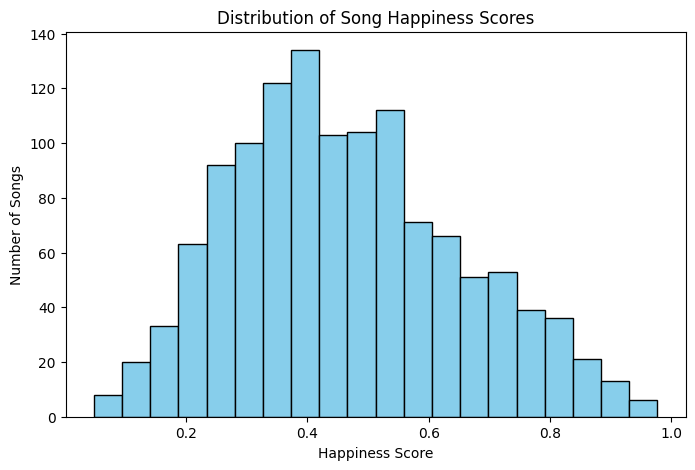

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(merged['happiness_from_lyrics'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Song Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Number of Songs')
plt.show()

In [ ]:
merged.to_csv("data/dataset_lyrics.csv", index=False)